**PROYECTO 3**


**AUTORES**: 

             Oscar Fallas B92861

             Daniel Chacon B72018
             
             Alejandro Castillo B81787
                                                                                            



**MODULACIÓN PAM**

Dada un secuencia de bits bcT almancenando cada bit en un arreglo, se procederá a realizar modulación PAM con M = 4

La secuencia de entrada es: [0 1 0 0 1 0 0]


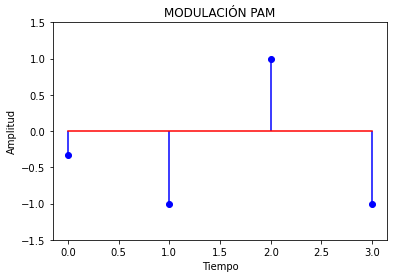

La secuencia modulada x(k):  [-0.33333333 -1.          1.         -1.        ]


In [32]:
import numpy as np
import matplotlib.pyplot as plt
M = 4 



def modulacionPAM(bc):
    # Verificar que la longitud de la secuencia de bits bc(ℓ) sea múltiplo de log2(M)
    b = int(np.log2(M))
    if len(bc) % b != 0:
        # Rellenar con ceros si no es múltiplo
        bc = np.concatenate([bc, np.zeros(b - len(bc) % b)])

    # Dividir la secuencia de bits en grupos de M
    grupos = [bc[i:i+int(np.log2(M))] for i in range(0, len(bc), int(np.log2(M)))]
    #print(grupos)

    # Diccionario de asignación de símbolos de amplitud
    simbolos = {
        (0, 0): -1,
        (0, 1): -1/3,
        (1, 0): 1,
        (1, 1): 1/3
        }
    
    #Señal Modulada 
    x_k = []
    for señal in grupos:
        t_señal = tuple(señal)
        simbolo = simbolos[tuple(t_señal)]
        x_k.append(simbolo)
    x_k = np.array(x_k)

    #Definimos el tren de pulsos de amplitud 1 y longitud 20
    t = np.arange(0,len(x_k),1)
    p = np.ones_like(t)
    #print(t)
    x_k = x_k*p
    #print(x_k)

    # Graficar el tren de pulsos
    plt.stem(t, x_k, linefmt='b-', markerfmt='bo', basefmt='r-')

    # Configurar etiquetas y título del gráfico
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.title("MODULACIÓN PAM")

    # Ajustar los límites del eje y
    plt.ylim(-1.5, 1.5)
    plt.show()

    return x_k
        
bcT = np.array([0, 1, 0, 0, 1, 0, 0])
print("La secuencia de entrada es:",bcT)
x_k = modulacionPAM(bcT)
print("La secuencia modulada x(k): ", x_k)



**MEDIO DE TRANSMISIÓN RUIDOSO**

Simule un medio de transmisión ruidoso definiendo un ruido N
y almacenándola en una variable N. Escriba un programa que cambie aleatoriamente el valor de cada muestra de una secuencia de muestras transmitidos x(k), almacenada en un arreglo xT. Las muestras modificados deben conformar la secuencia de muestras recibidos  x∗(k), del mismo tamaño de x(k), almacenada en un arreglo xR.


In [33]:
def add_noise(x, snr):
    # Calcular la potencia de la señal transmitida
    signal_power = np.mean(np.abs(x) ** 2)

    # Calcular la potencia del ruido en función de la relación señal-ruido (SNR)
    noise_power = signal_power / (10 ** (snr / 10))

    # Generar el ruido gaussiano
    noise = np.random.normal(0, np.sqrt(noise_power), len(x))

    # Sumar el ruido a la señal transmitida
    x_r = x + noise

    return x_r

x_R = add_noise(x_k, 10)
print("Secuencia con ruido: ", x_R)

Secuencia con ruido:  [-0.17722419 -1.40615178  1.35048914 -0.87958961]


**Desmodulador digital banda-base**
Simule un desmodulador digital banda-base que utilice un esquema de modulación PAM de orden  M , definiendo un procedimiento de muestreo o de integración y descarte y escribiendo un programa que recupere los bits de una secuencia de información, almacenada en un arreglo a partir de una secuencia de muestras.


In [34]:
def demodulacionPAM(x_k):
    # Diccionario inverso de asignación de símbolos de amplitud
    simbolos_inversos = {
        -1: (0, 0),
        -1/3: (0, 1),
        1: (1, 0),
        1/3: (1, 1)
    }
    
    # Lista para almacenar la secuencia de bits demodulada
    bits_demodulados = []
    
    # Obtener la longitud original de la secuencia de bits
    longitud_original = len(x_k) * int(np.log2(M))
    
    # Iterar sobre cada símbolo de amplitud en la secuencia modulada
    for simbolo in x_k:
        # Buscar el símbolo de amplitud correspondiente en el diccionario inverso
        bits = simbolos_inversos[simbolo]
        
        # Agregar los bits a la secuencia demodulada
        bits_demodulados.extend(bits)
    
    # Verificar si se agregaron ceros durante la modulación
    diferencia = len(bits_demodulados) - longitud_original
    if diferencia > 0:
        # Eliminar los ceros adicionales
        bits_demodulados = bits_demodulados[:-diferencia]
    
    # Convertir la lista de bits demodulados en un array numpy
    bits_demodulados = np.array(bits_demodulados)
    
    return bits_demodulados

bits_demodulados = demodulacionPAM(x_k)
print("La secuencia de bits demodulada: ", bits_demodulados)


La secuencia de bits demodulada:  [0 1 0 0 1 0 0 0]


**Proyecto Integrado**

En la siguiente sección se procede a conectar los componentes de modulación y demodulación con las partes anteriormente realizadas(codificador de fuente, codificador de canal) con el fin de comprobar su correcto funcionamiento. Para estoy dirigase al archivo proyecto_integrado.py, este se le realizó una interfaz interactiva para que el usuario escoja que elementos quiere probar:

                                                                                                    --opcion 1--: codificación canal 
                                                                                                    --opcion 2--: cofificación de fuente y canal
                                                                                                    --opcion 3--: codificación de fuente, canal y modulacion banda base

Tambien, en el código abajo note que se exporta el archivo por lo que puede utilizarlo desde aquí. Además, el código despliega toda la información necesaria para ir demostrando que se cumple satisfactoriamente el proceso de comunicación. 

Menú de opciones:
1. Opción 1: Codificación de canal
2. Opción 2: Codificación de fuente y canal
3. Opción 3: Codificación de fuente, canal y modulación
Ha seleccionado la opción 3
El mensaje es: Hola
El mensaje codificado con formato de impresión binaria:  0b1001000011011110110110001100001
El mensaje codificado es:  01001000011011110110110001100001


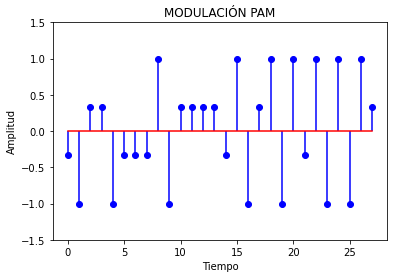

01001111000101011000111111110110001110001001100010001011
Antes correcion:  [0 1 0 0 1 1 1]
sindrome: 000
0
Despues correcion:  [0 1 0 0 1 1 1]
Antes correcion:  [1 0 0 0 1 0 1]
sindrome: 000
1
Despues correcion:  [1 0 0 0 1 0 1]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [1 1 1 1 1 1 1]
sindrome: 000
1
Despues correcion:  [1 1 1 1 1 1 1]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [1 1 0 0 0 1 0]
sindrome: 000
1
Despues correcion:  [1 1 0 0 0 1 0]
Antes correcion:  [0 1 1 0 0 0 1]
sindrome: 000
0
Despues correcion:  [0 1 1 0 0 0 1]
Antes correcion:  [0 0 0 1 0 1 1]
sindrome: 000
0
Despues correcion:  [0 0 0 1 0 1 1]
Secuencia enviada:  01001000011011110110110001100001
La secuencia modulada x(k):  [-0.33333333 -1.          0.33333333  0.33333333 -1.         -0.33333333
 -0.33333333 -0.33333333  1.         -1.          0.33333333  0.33333333
  0.33333333  0.33333333 -0

In [35]:
import modulación_PAM as mpam

# Menú
print("Menú de opciones:")
print("1. Opción 1: Codificación de canal")
print("2. Opción 2: Codificación de fuente y canal")
print("3. Opción 3: Codificación de fuente, canal y modulación")

opcion_seleccionada = int(input("Seleccione una opción: "))
mpam.menu(opcion_seleccionada)